In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from mpl_toolkits.basemap import Basemap
from itertools import chain
from sklearn.metrics import r2_score

# Results Analysis
The objective of this notebook is to analyze the results obtained throughout the work done.

## Synthetic tests


- In addition to Tudor's synthetic tests, there are a few other things that should get tested:
    - Model parameters which are not distributed in the same way (e.g. two gaussians that decay at different rates and are centered in different locations)
	- Chosen Parameter (Voronoi, Delaunay, Delaunay-Cloughner)
	- Parallel Chains & Parallel Tempering (1 Chain, 4 Parallel Chains, 2 Parallel Chains at 2 temperatures each)

### Models and observations 
Synthetic tests must be somewhat representative of the data that we are trying to invert for:

In [2]:
# Load true model parameters 
snow_true = np.loadtxt("SyntheticTests/syntheticobs_franke.img.A")
ice_true =  np.loadtxt("SyntheticTests/syntheticobs_franke.img.B")

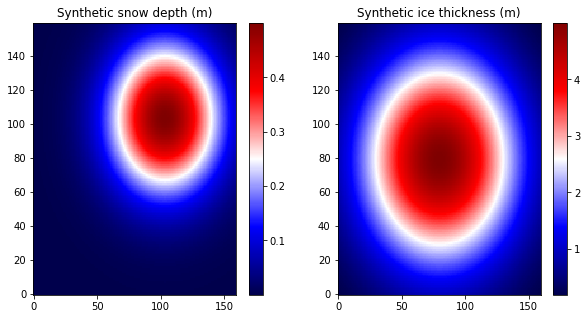

In [11]:
# Plot true models
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

img = ax[0].imshow(snow_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower')
ax[0].set_title('Synthetic snow depth (m)')
plt.colorbar(img, ax=ax[0])

img = ax[1].imshow(ice_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower')
ax[1].set_title('Synthetic ice thickness (m)')
plt.colorbar(img, ax=ax[1])

plt.show()


In [14]:
# Load observations
obs = pd.read_table("SyntheticTests/synthetic_obs.txt", skiprows=1, names=["Lon", "Lat", "Type", "Value", "Sigma"], delimiter="\s+")

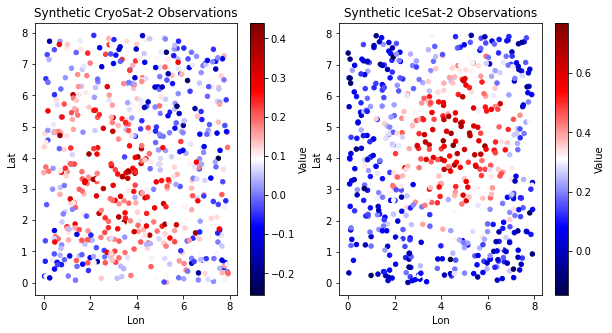

In [19]:
# Plot observations
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

obs[obs['Type']==0].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[0], title='Synthetic CryoSat-2 Observations', cmap='seismic')
obs[obs['Type']==1].plot(kind="scatter", x='Lon', y='Lat', c="Value", ax=ax[1], title='Synthetic IceSat-2 Observations', cmap='seismic')

plt.show()


### Different Parameters
Here we will try to understand how different tessellation parameters work. First let's take a look at the plots themselves side by side and then we will load up some statistics.

In [44]:
# Load data
voronoi = [np.loadtxt("SyntheticTests/Voronoi/snow"), np.loadtxt("SyntheticTests/Voronoi/ice")]
delaunay = [np.loadtxt("SyntheticTests/Delaunay/snow"), np.loadtxt("SyntheticTests/Delaunay/ice")]
delaunay_c = [np.loadtxt("SyntheticTests/DelaunayClaughner/snow"), np.loadtxt("SyntheticTests/DelaunayClaughner/ice")]

Text(0.5, 1.0, 'Delaunay-Cloughner ice thickness inversion')

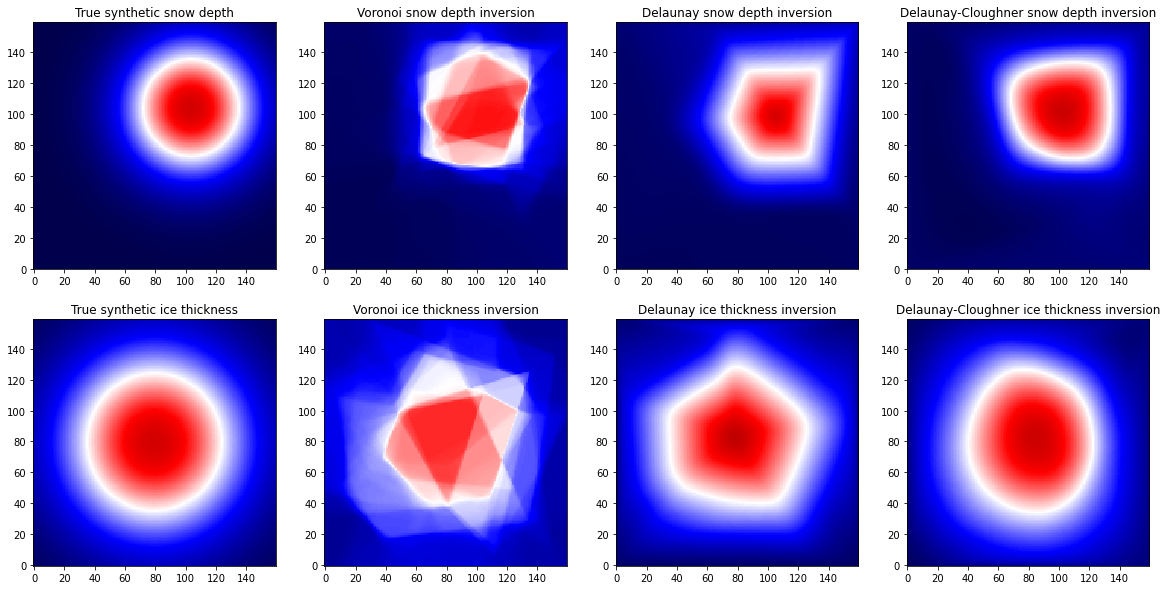

In [45]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

img = ax[0, 0].imshow(snow_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 0].set_title('True synthetic snow depth')
img = ax[0, 1].imshow(voronoi[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 1].set_title('Voronoi snow depth inversion')
img = ax[0, 2].imshow(delaunay[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 2].set_title('Delaunay snow depth inversion')
img = ax[0, 3].imshow(delaunay_c[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 3].set_title('Delaunay-Cloughner snow depth inversion')

img = ax[1, 0].imshow(ice_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 0].set_title('True synthetic ice thickness')
img = ax[1, 1].imshow(voronoi[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 1].set_title('Voronoi ice thickness inversion')
img = ax[1, 2].imshow(delaunay[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 2].set_title('Delaunay ice thickness inversion')
img = ax[1, 3].imshow(delaunay_c[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 3].set_title('Delaunay-Cloughner ice thickness inversion')



### Parallelization

In [56]:
# Load data
chain1 = [np.loadtxt("SyntheticTests/1Chain/snow"), np.loadtxt("SyntheticTests/1Chain/ice")]
chain4 = [np.loadtxt("SyntheticTests/4Chains/snow"), np.loadtxt("SyntheticTests/4Chains/ice")]
chain2temp2 = [np.loadtxt("SyntheticTests/2Chains2T/snow"), np.loadtxt("SyntheticTests/2Chains2T/ice")]

Text(0.5, 1.0, '2 Chains at 2 Temperatures')

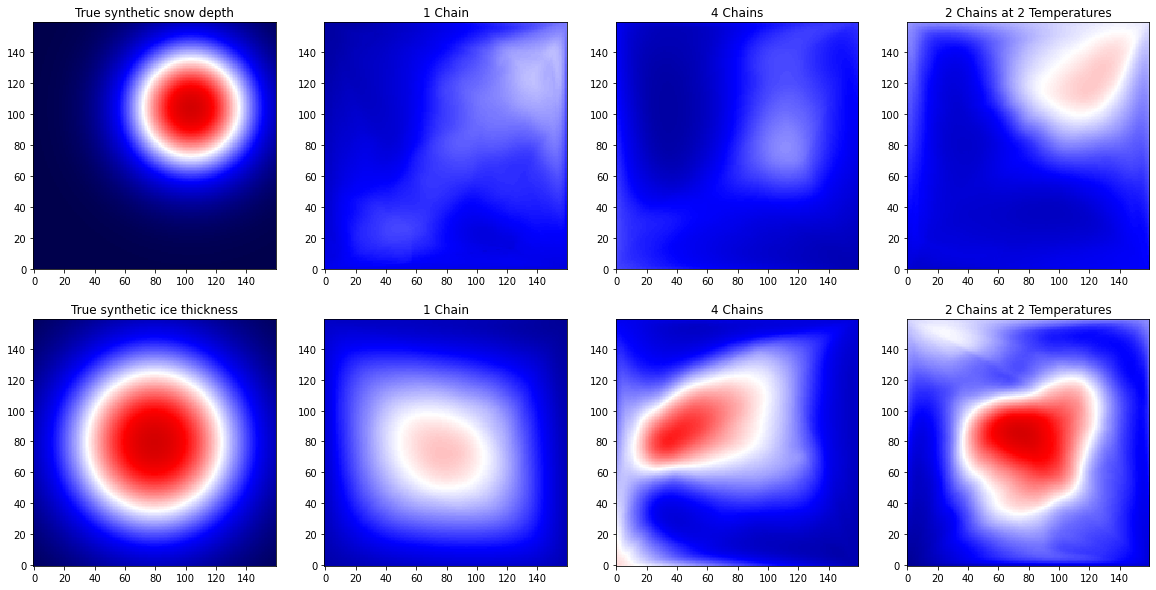

In [57]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))

img = ax[0, 0].imshow(snow_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 0].set_title('True synthetic snow depth')
img = ax[0, 1].imshow(chain1[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 1].set_title('1 Chain')
img = ax[0, 2].imshow(chain4[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 2].set_title('4 Chains')
img = ax[0, 3].imshow(chain2temp2[0], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=0.6)
ax[0, 3].set_title('2 Chains at 2 Temperatures')

img = ax[1, 0].imshow(ice_true, cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 0].set_title('True synthetic ice thickness')
img = ax[1, 1].imshow(chain1[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 1].set_title('1 Chain')
img = ax[1, 2].imshow(chain4[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 2].set_title('4 Chains')
img = ax[1, 3].imshow(chain2temp2[1], cmap='seismic', aspect='auto', interpolation='None', origin='lower', vmin=0, vmax=6)
ax[1, 3].set_title('2 Chains at 2 Temperatures')



## Finding the best model
Now we will invert using real data. For this, we chose 30 days worth of data during January, to ensure that we have enough coverage with our observations and a sufficiently wide range of values for the hieararchical models.

### Observations
We present here our observations for CryoSat-2, AltiKa, and IceSat-2. Additionally, we also tried CryoSat-2 and AltiKa data from the Bristol LARM.

In [86]:
# Load up observation data 
observations = pd.read_csv("Observations/CS_AK.txt", skiprows=1, names=["Longitude", "Latitude", "Type", "Value", "StdDev"], delimiter="\s+")
observations2 = pd.read_csv("Observations/CS_IS.txt", skiprows=1, names=["Longitude", "Latitude", "Type", "Value", "StdDev"], delimiter="\s+")
observations_cs = observations[observations['Type'] == 0]
observations_ak = observations[observations['Type'] == 1]
observations_is = observations2[observations2['Type'] == 1]

<AxesSubplot:title={'center':'AltiKa'}, xlabel='Longitude', ylabel='Latitude'>

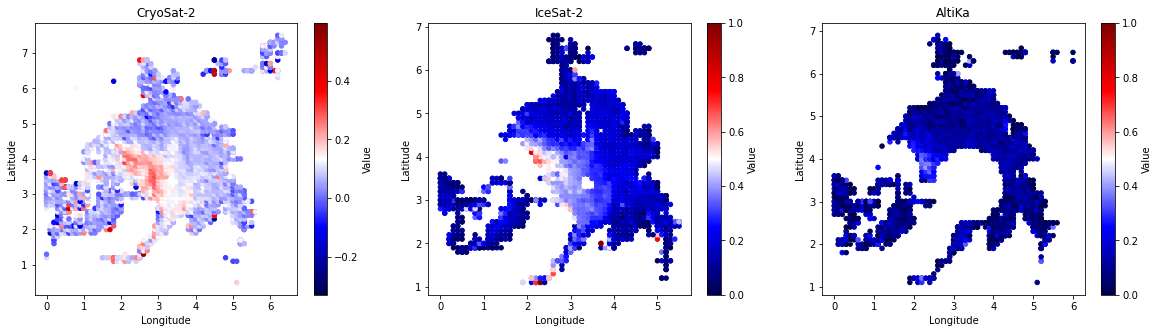

In [87]:
# Plot CS2, AltiKa, IS2
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
observations_cs.plot(kind='scatter', x='Longitude', y='Latitude', c='Value', cmap='seismic', ax=ax[0], title='CryoSat-2')
observations_is.plot(kind='scatter', x='Longitude', y='Latitude', c='Value', cmap='seismic', ax=ax[1], title='IceSat-2', vmin=0.0, vmax=1.0)
observations_ak.plot(kind='scatter', x='Longitude', y='Latitude', c='Value', cmap='seismic', ax=ax[2], title='AltiKa', vmin=0.0, vmax=1.0)

# Plot Bristol CS2 and Bristol AltiKa

In [88]:
def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.drawlsmask(land_color='gray',ocean_color='white',lakes=True)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

def mask_observations(observations, inversion):
    new_inversion = np.copy(inversion)
    for i in range(len(observations)):
        for j in range(len(observations[0])):
            if np.isnan(observations[i][j]):
                new_inversion[i][j] = np.nan
    return new_inversion

In [89]:
%cd ../Results

/Users/joel/my-repos/MSCI_2021_Project3/snow_ice/Results


In [96]:
cs = np.load("../data/CPOM/freeboard_daily_processed/CS2_CPOM/dailyFB_50km_2019-2020_season.pkl", allow_pickle=True)
is2 = np.load("../data/IS2/dailyFB_50km_2019-2020_season.pkl", allow_pickle=True)
ak = np.load("../data/CPOM/freeboard_daily_processed/AK_CPOM/dailyFB_50km_2019-2020_season.pkl", allow_pickle=True)

cs_bristol = np.load("../data/CPOM/freeboard_daily_processed/Bristol_LARM/CS2/freeboard/dailyFB_50km_2019-2020_season.pkl", allow_pickle=True)
ak_bristol = np.load("../data/CPOM/freeboard_daily_processed/Bristol_LARM/AK/dailyFB_50km_2019-2020_season.pkl", allow_pickle=True)


grid_x = np.load("Observations/WG_x.npy")
grid_y = np.load("Observations/WG_y.npy")

lon_g = np.load('Observations/will_lons.npy')[1:, 1:]
lat_g = np.load('Observations/will_lats.npy')[1:, 1:]

sliding_window = 30

shape = (sliding_window, 160, 160)
ak_map = np.empty(shape)
cs_map = np.empty(shape)
is_map = np.empty(shape)
cs_bristol_map = np.empty(shape)
ak_bristol_map = np.empty(shape)

for i, date in enumerate(list(cs.keys())[100:100+sliding_window]):
    cs_map[i] += cs[date][:160, :160]
    is_map[i] += is2[date][:160, :160]
    ak_map[i] += ak[date][:160, :160]
    cs_bristol_map[i] += cs_bristol[date][:160, :160]
    ak_bristol_map[i] += ak_bristol[date][:160, :160]



with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    cs_mean = np.nanmean(cs_map, axis=0)
    is_mean = np.nanmean(is_map, axis=0)
    ak_mean = np.nanmean(ak_map, axis=0)
    cs_bristol_mean = np.nanmean(cs_bristol_map, axis=0)
    ak_bristol_mean = np.nanmean(ak_bristol_map, axis=0)

cs_bristol_mean = mask_observations(is_mean, cs_bristol_mean)
ak_bristol_mean = mask_observations(is_mean, ak_bristol_mean)

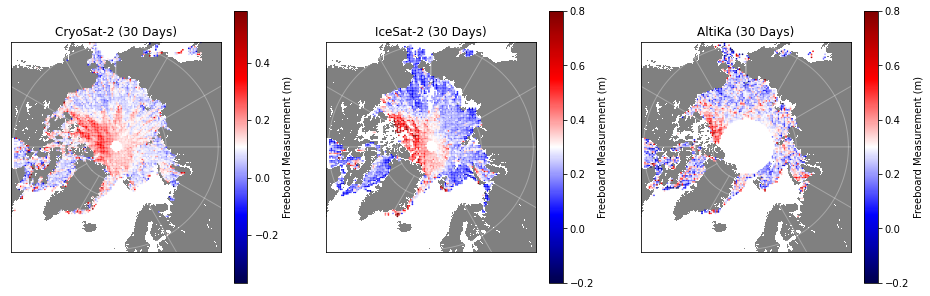

In [106]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(131)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=cs_mean, cmap="seismic")
plt.colorbar(label=r'Freeboard Measurement (m)')
plt.title("CryoSat-2 (30 Days)")

ax = fig.add_subplot(132)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=is_mean, cmap="seismic", vmin=-0.2, vmax=0.8)
plt.colorbar(label=r'Freeboard Measurement (m)')
plt.title('IceSat-2 (30 Days)')

ax = fig.add_subplot(133)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ak_mean, cmap="seismic", vmin=-0.2, vmax=0.8)
plt.colorbar(label=r'Freeboard Measurement (m)')
plt.title('AltiKa (30 Days)')

plt.show()


Text(0.5, 1.0, 'AltiKa (Bristol Data) (30 Days)')

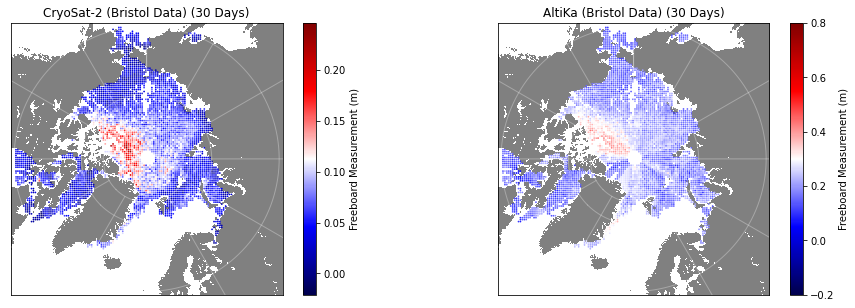

In [108]:
fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=cs_bristol_mean, cmap="seismic")
plt.colorbar(label=r'Freeboard Measurement (m)')
plt.title("CryoSat-2 (Bristol Data) (30 Days)")

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ak_bristol_mean, cmap="seismic", vmin=-0.2, vmax=0.8)
plt.colorbar(label=r'Freeboard Measurement (m)')
plt.title('AltiKa (Bristol Data) (30 Days)')

### Inversions 
Now we plot the resulting inversions (with the same configuration)

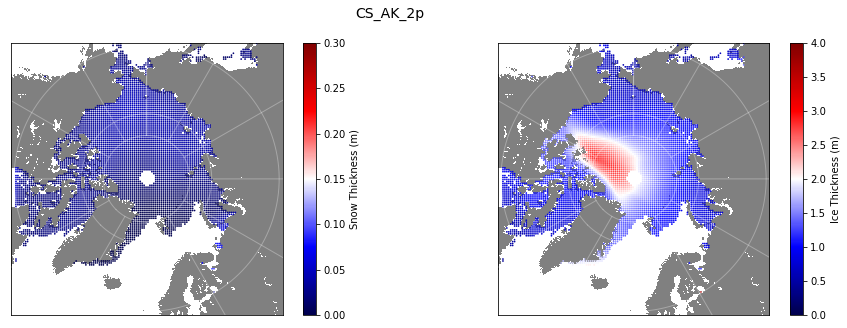

In [110]:
# CS2 - AK - 2p 
# Snow, Ice
snow_mat = np.loadtxt("BestModel/CS_AK_2p/snow")
ice_mat = np.loadtxt("BestModel/CS_AK_2p/ice")

snow_mat = mask_observations(cs_mean, snow_mat)
ice_mat = mask_observations(cs_mean, ice_mat)

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

fig.suptitle("CS_AK_2p", fontsize=14)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow_mat, cmap="seismic", vmin=0, vmax=0.3)
plt.colorbar(label=r'Snow Thickness (m)')

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice_mat, cmap="seismic", vmin=0, vmax=4)
plt.colorbar(label=r'Ice Thickness (m)')

plt.show()

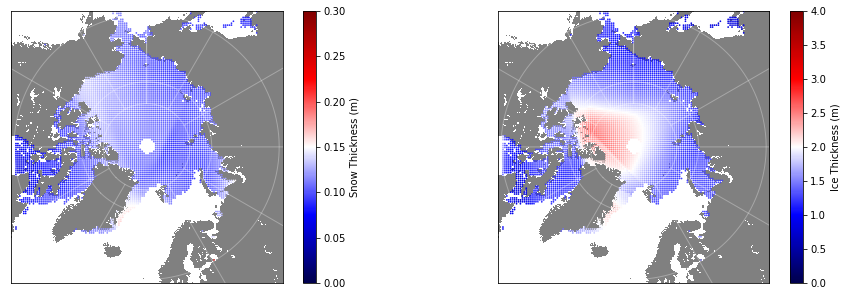

In [150]:
# CS2 - AK - 2p - Bristol
# Snow, Ice
snow_mat = np.loadtxt("BestModel/CS_AK_2p_bristol/snow")
ice_mat = np.loadtxt("BestModel/CS_AK_2p_bristol/ice")

fig.suptitle("CS_AK_2p (Bristol data)", fontsize=14)

snow_mat = mask_observations(cs_mean, snow_mat)
ice_mat = mask_observations(cs_mean, ice_mat)

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow_mat, cmap="seismic", vmin=0, vmax=0.3)
plt.colorbar(label=r'Snow Thickness (m)')

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice_mat, cmap="seismic", vmin=0, vmax=4)
plt.colorbar(label=r'Ice Thickness (m)')

plt.show()

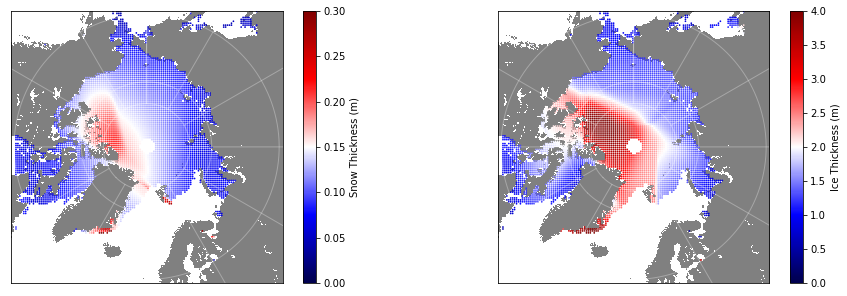

In [113]:
# CS2 - IS2 - 2p
# Snow, Ice
snow_mat = np.loadtxt("BestModel/CS_IS2_2p/snow")
ice_mat = np.loadtxt("BestModel/CS_IS2_2p/ice")

snow_mat = mask_observations(cs_mean, snow_mat)
ice_mat = mask_observations(cs_mean, ice_mat)

fig = plt.figure(figsize=(16, 5))
ax = fig.add_subplot(121)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow_mat, cmap="seismic", vmin=0, vmax=0.3)
plt.colorbar(label=r'Snow Thickness (m)')

ax = fig.add_subplot(122)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice_mat, cmap="seismic", vmin=0, vmax=4)
plt.colorbar(label=r'Ice Thickness (m)')

plt.show()

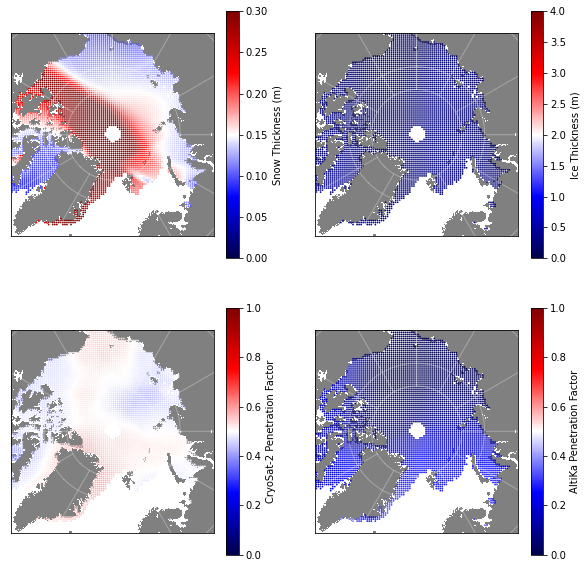

In [118]:
# CS2 - AK - 4p 
# Snow, Ice, CS Penetration, AK Penetration
snow_mat = np.loadtxt("BestModel/CS_AK_4p/snow")
ice_mat = np.loadtxt("BestModel/CS_AK_4p/ice")
cs_penetration_mat =  np.loadtxt("BestModel/CS_AK_4p/cs2_penetration")
ak_penetration_mat =  np.loadtxt("BestModel/CS_AK_4p/ak_penetration")

snow_mat = mask_observations(cs_mean, snow_mat)
ice_mat = mask_observations(cs_mean, ice_mat)
cs_penetration_mat = mask_observations(cs_mean, cs_penetration_mat)
ak_penetration_mat = mask_observations(cs_mean, ak_penetration_mat)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221)

m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.5E7, height=0.5E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow_mat, cmap="seismic", vmin=0, vmax=0.3)
plt.colorbar(label=r'Snow Thickness (m)')

ax = fig.add_subplot(222)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.5E7, height=0.5E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice_mat, cmap="seismic", vmin=0, vmax=4)
plt.colorbar(label=r'Ice Thickness (m)')

ax = fig.add_subplot(223)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.5E7, height=0.5E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=cs_penetration_mat, cmap="seismic", vmin=0, vmax=1)
plt.colorbar(label=r'CryoSat-2 Penetration Factor')

ax = fig.add_subplot(224)
m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.5E7, height=0.5E7)
draw_map(m)
m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ak_penetration_mat, cmap="seismic", vmin=0, vmax=1)
plt.colorbar(label=r'AltiKa Penetration Factor')

plt.show()

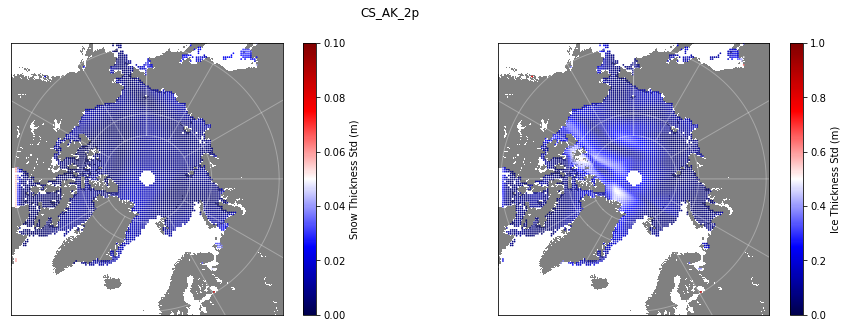

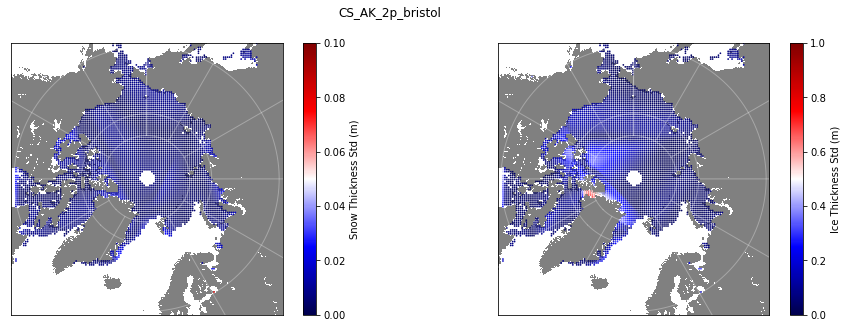

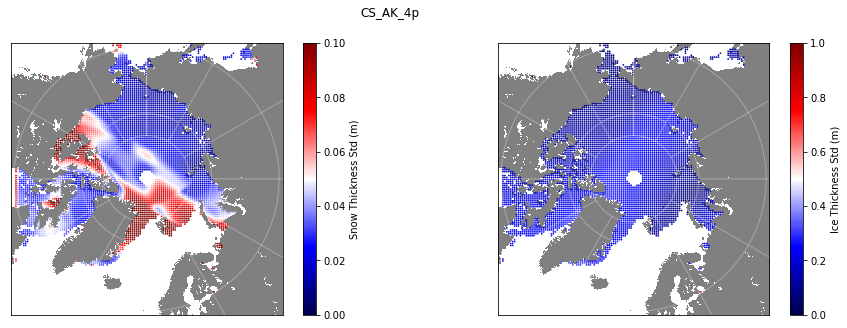

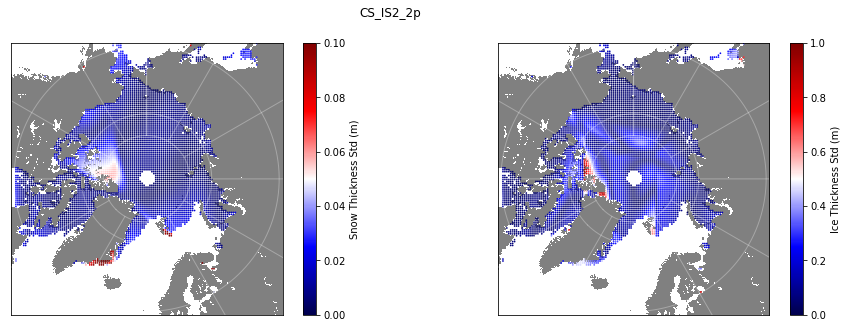

In [157]:
models = ['CS_AK_2p', 'CS_AK_2p_bristol', 'CS_AK_4p', 'CS_IS2_2p']
for model in models:
    # Snow, Ice
    snow_mat = np.loadtxt(f"BestModel/{model}/dailyFB_50km_2019-2020_season.pkl_snow_stddev")
    ice_mat = np.loadtxt(f"BestModel/{model}/dailyFB_50km_2019-2020_season.pkl_ice_stddev")

    snow_mat = mask_observations(cs_mean, snow_mat)
    ice_mat = mask_observations(cs_mean, ice_mat)

    fig = plt.figure(figsize=(16, 5))
    fig.suptitle(f"{model}")
    ax = fig.add_subplot(121)

    m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
    draw_map(m)
    m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow_mat, cmap="seismic", vmin=0, vmax=0.1)
    plt.colorbar(label=r'Snow Thickness Std (m)')

    ax = fig.add_subplot(122)
    m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
    draw_map(m)
    m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice_mat, cmap="seismic", vmin=0, vmax=1)
    plt.colorbar(label=r'Ice Thickness Std (m)')

    plt.show()

### Statistics
Now we will load up all the information we have on the residuals, and compute the **RMSE**, **MD** and **R^2**.

In [152]:
# Calculate Statistics
results = []
models = ['CS_AK_2p', 'CS_AK_2p_bristol', 'CS_AK_4p', 'CS_IS2_2p']

for model in models:
    observations = pd.read_csv(f"Observations/{model}.txt", skiprows=1, names=['Longitude', 'Latitude', 'Type', 'Value', 'Sigma'], delimiter="\s+")
    all_residuals = np.zeros((4, len(observations)))
    for i in range(4):
        all_residuals[i] = np.loadtxt(f"BestModel/{model}/residuals.txt-00{i}")
    errors_across_all_chains = np.mean(all_residuals, axis=0)

    rmse = np.sqrt(np.mean((errors_across_all_chains)**2))
    md = np.mean(errors_across_all_chains)
    observations = pd.read_csv(f"Observations/{model}.txt", skiprows=1, names=['Longitude', 'Latitude', 'Type', 'Value', 'Sigma'], delimiter="\s+")
    trues = observations['Value']
    predicted = trues + errors_across_all_chains
    coefficient_of_dermination = r2_score(trues, predicted)
    results.append([rmse, md, coefficient_of_dermination])

In [153]:
pd.DataFrame(results, columns=['RMSE', 'MD', 'R^2'], index=models)

RMSE        MD       R^2
CS_AK_2p          0.060042  0.000145  0.375748
CS_AK_2p_bristol  0.036474  0.000135  0.810913
CS_AK_4p          0.059593  0.000143  0.385046
CS_IS2_2p         0.065297  0.000179  0.692410

## Time Windows
Now we will shift our focus entirely into the CS_IS_2p model rolling windows as it seems to provide the best results while keeping a reasonably low computation time.

In [46]:
%cd ../CS_IS2_2p

/Users/joel/my-repos/MSCI_2021_Project3/snow_ice/CS_IS2_2p


In [49]:
from InversionBinnedParallel import main

In [55]:
windows_results = {}

In [52]:
# 30 Days
results = main(render_map=False, render_observations=False, render_stddev=False)
windows_results['30'] = results

In [58]:
# 20 Days
results = main(render_map=False, render_observations=False, render_stddev=False, sliding_window=20)
windows_results['20'] = results

In [59]:
# 15 Days
results = main(render_map=False, render_observations=False, render_stddev=False, sliding_window=15)
windows_results['15'] = results

In [121]:
# 10 Days
results = main(render_map=False, render_observations=False, render_stddev=False, sliding_window=10)
windows_results['10'] = results

In [122]:
# 7 Days
results = main(render_map=False, render_observations=False, render_stddev=False, sliding_window=7)
windows_results['7'] = results

In [123]:
# 5 Days
results = main(render_map=False, render_observations=False, render_stddev=False, sliding_window=5)
windows_results['5'] = results

In [127]:
results_df = pd.DataFrame(windows_results).T

In [130]:
results_df.to_csv("../Results/results_time_window.csv")

In [139]:
results_df

rmse        md        r2
30  0.065297  0.000179  0.692410
20  0.063390  0.000176  0.694648
15  0.062340  0.000297  0.710683
10  0.067997  0.000603  0.666000
7   0.062296  0.000188  0.702645
5   0.067697  0.000259  0.675986

In [140]:
%cd ../Results

/Users/joel/my-repos/MSCI_2021_Project3/snow_ice/Results


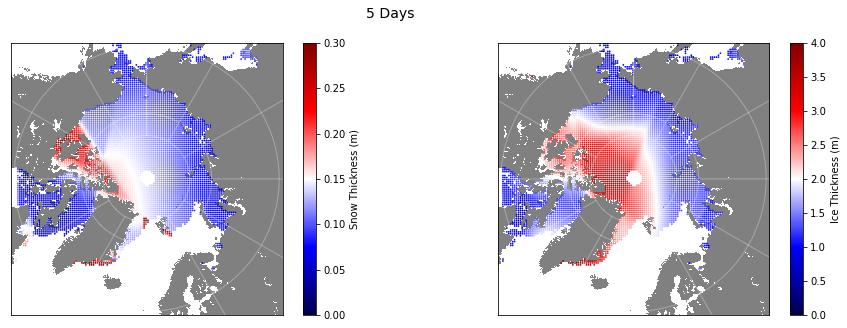

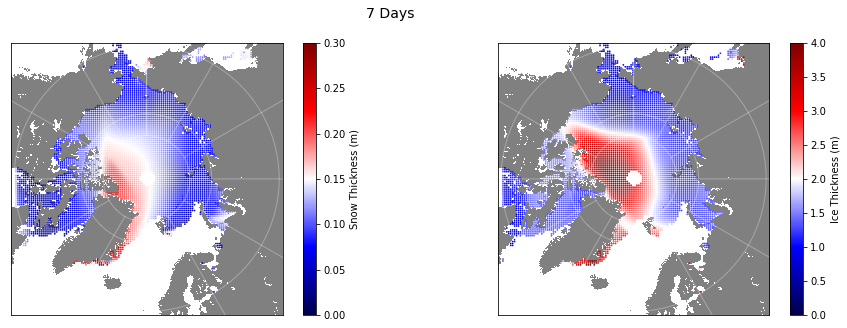

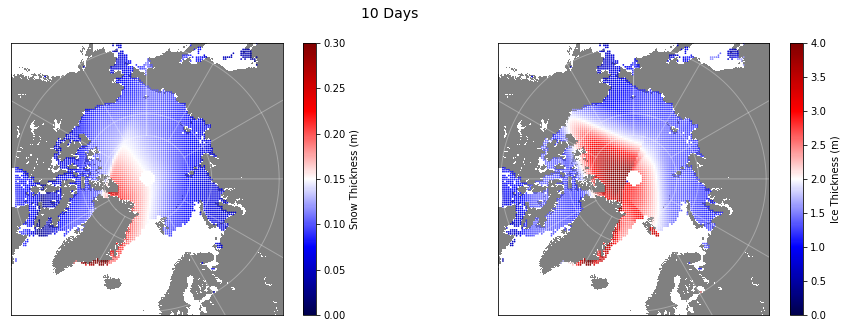

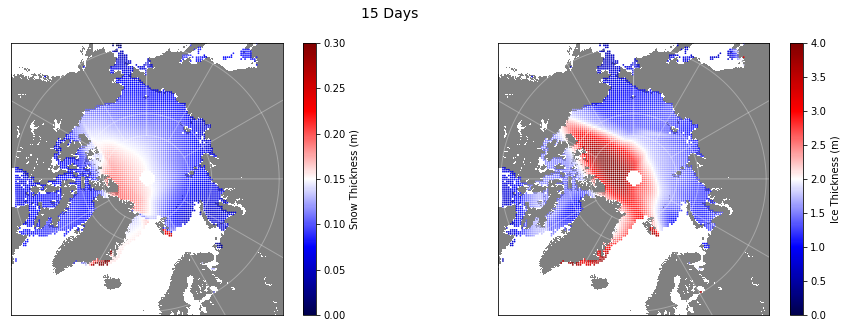

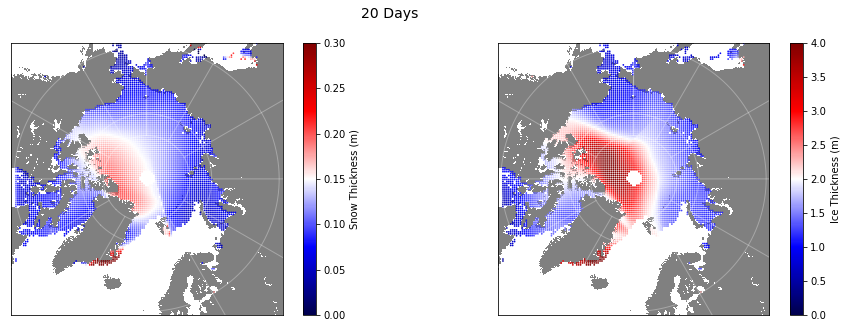

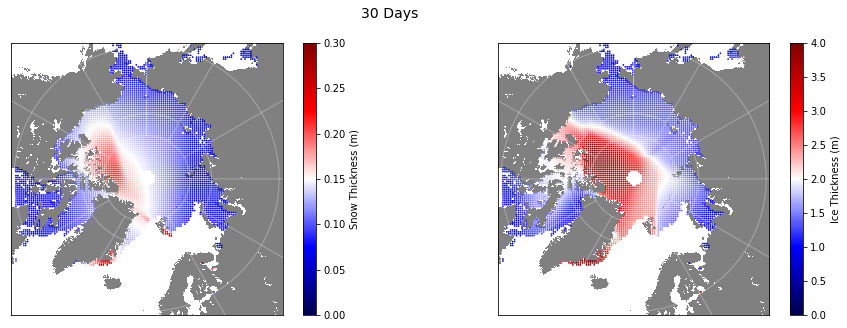

In [149]:
days = [5, 7, 10, 15, 20, 30]
for day in days:
    snow_mat = np.loadtxt(f"Windows/{day}/images/dailyFB_50km_2019-2020_season.pkl_snow")
    ice_mat = np.loadtxt(f"Windows/{day}/images/dailyFB_50km_2019-2020_season.pkl_ice")

    snow_mat = mask_observations(cs_mean, snow_mat)
    ice_mat = mask_observations(cs_mean, ice_mat)

    fig = plt.figure(figsize=(16, 5))

    fig.suptitle(f"{day} Days", fontsize=14)

    ax = fig.add_subplot(121)

    m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
    draw_map(m)
    m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow_mat, cmap="seismic", vmin=0, vmax=0.3)
    plt.colorbar(label=r'Snow Thickness (m)')

    ax = fig.add_subplot(122)
    m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
    draw_map(m)
    m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice_mat, cmap="seismic", vmin=0, vmax=4)
    plt.colorbar(label=r'Ice Thickness (m)')

    plt.show()

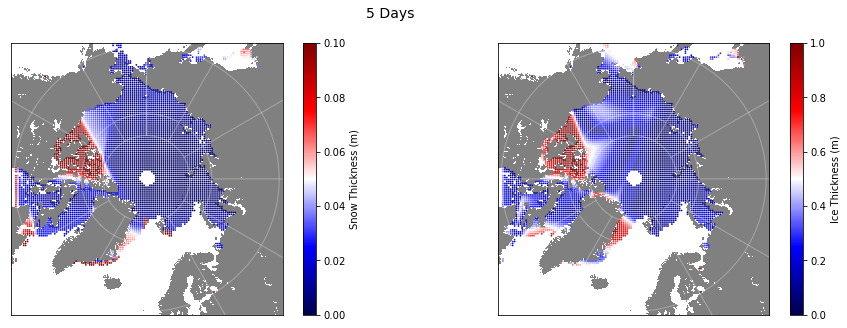

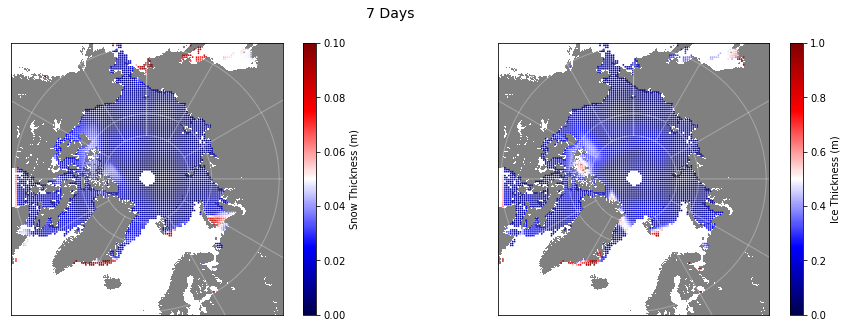

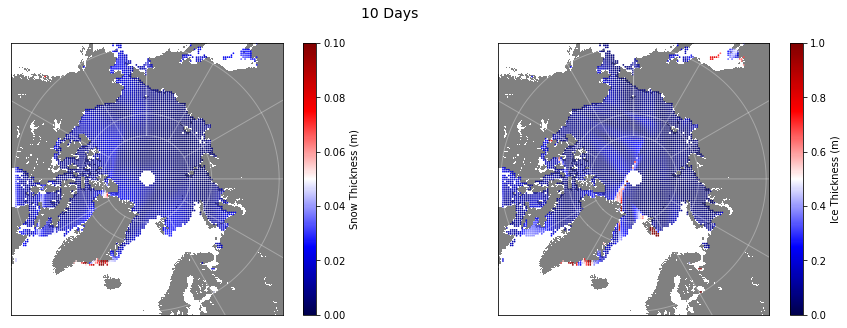

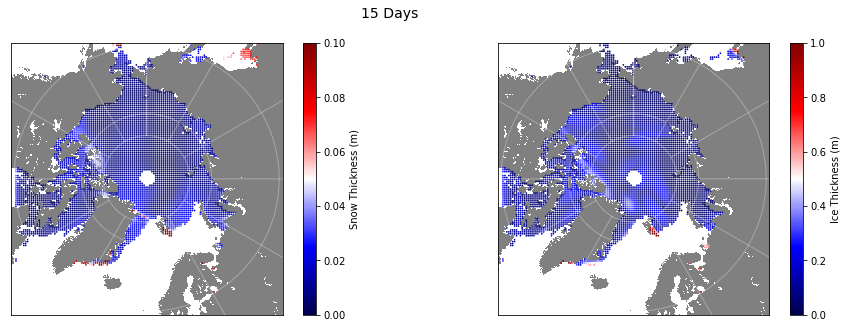

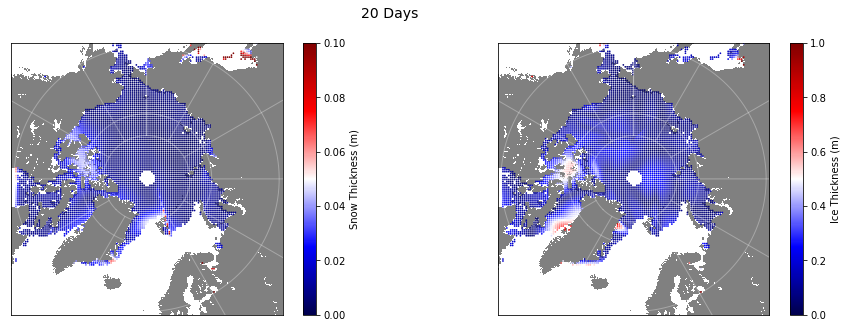

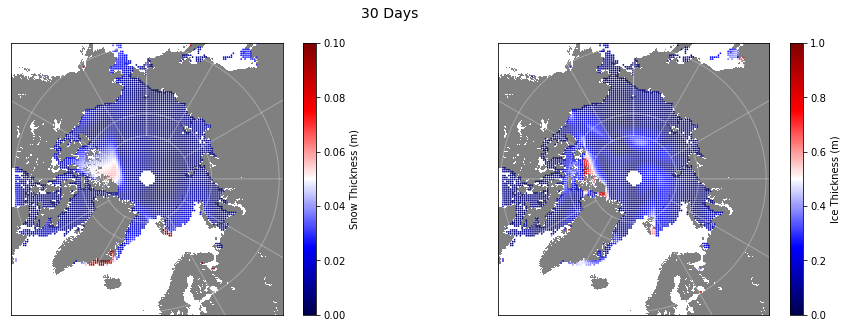

In [161]:
days = [5, 7, 10, 15, 20, 30]
for day in days:
    snow_mat = np.loadtxt(f"Windows/{day}/images/dailyFB_50km_2019-2020_season.pkl_snow_stddev")
    ice_mat = np.loadtxt(f"Windows/{day}/images/dailyFB_50km_2019-2020_season.pkl_ice_stddev")

    snow_mat = mask_observations(cs_mean, snow_mat)
    ice_mat = mask_observations(cs_mean, ice_mat)

    fig = plt.figure(figsize=(16, 5))

    fig.suptitle(f"{day} Days", fontsize=14)

    ax = fig.add_subplot(121)

    m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
    draw_map(m)
    m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=snow_mat, cmap="seismic", vmin=0, vmax=0.1)
    plt.colorbar(label=r'Snow Thickness (m)')

    ax = fig.add_subplot(122)
    m = Basemap(projection='lcc', resolution=None, lat_0=-90, lon_0=0, lat_1=89.9, lon_1=180, width=0.7E7, height=0.7E7)
    draw_map(m)
    m.scatter(lon_g, lat_g, latlon=True, alpha=1, s=0.5, c=ice_mat, cmap="seismic", vmin=0, vmax=1)
    plt.colorbar(label=r'Ice Thickness (m)')

    plt.show()